In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import _tree
from decisiontree_table_converter.converter import tree_to_decision_table





In [2]:
warnings.filterwarnings('ignore')
df = pd.read_csv("drug200.csv")
df.head()
df['Drug'] = df['Drug'].astype('category')
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
X = df.drop(['Drug'],axis=1)
y = df['Drug']


In [3]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2 ,random_state=100)

clf = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train) 

clf = clf.fit(X_train,y_train)

class_names = clf.classes_
feature_names = X.columns

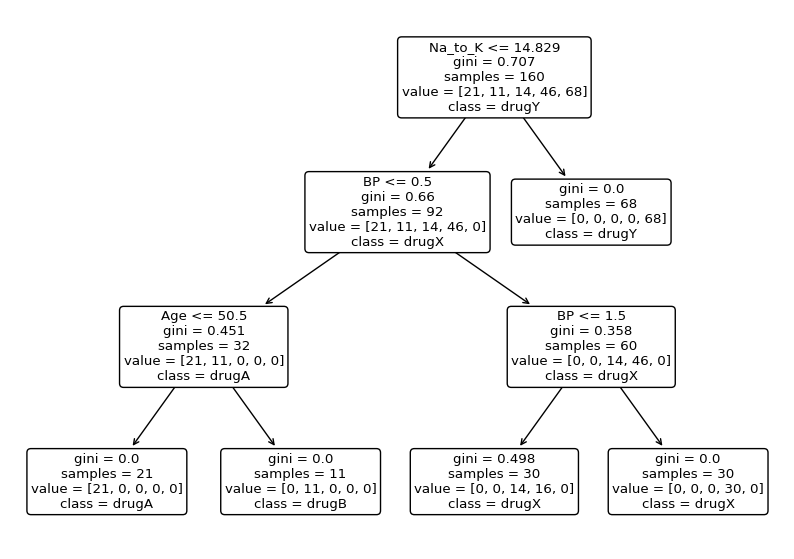

In [5]:
#TREE
tree = clf.tree_
plt.figure(figsize=(10, 7))
plot_tree(clf,feature_names=feature_names ,class_names = class_names , rounded=True);


In [6]:
clf = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train) 

clf = clf.fit(X_train,y_train)

In [7]:
clf = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train) 

clf = clf.fit(X_train,y_train)

class_names = clf.classes_
feature_names = X.columns


decision_table_df = tree_to_decision_table(clf, feature_names, class_names)
decision_table_df.to_csv('Drugs_DecisionTree.csv')

In [8]:
tree_to_decision_table(clf,class_names,feature_names)

,0,1,2,3,4
drugA,<= 50.50,> 50.50,-,-,-
drugB,-,-,-,-,-
drugC,<= 0.50,<= 0.50,(0.50; 1.50],> 1.50,-
drugX,-,-,-,-,-
drugY,<= 14.83,<= 14.83,<= 14.83,<= 14.83,> 14.83
Class,Age,Sex,Cholesterol,Cholesterol,Na_to_K
